In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
df = pd.read_csv("/content/drive/MyDrive/datasets/airbnb-listings.csv")

# Discover Data

In [48]:
df.shape

(7608, 18)

In [49]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Condo in Amsterdam · ★4.89 · 1 bedroom · 2 bed...,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69,3,336,2023-05-31,1.95,1,7,40,NaN
1,20168,Townhouse in Amsterdam · ★4.44 · 1 bedroom · 1...,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,106,1,339,2020-04-09,2.10,2,0,0,NaN
2,213371,Rental unit in Amsterdam · ★4.86 · 3 bedrooms ...,1100324,Hendrik,NaN,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270,4,23,2023-01-08,0.16,1,2,1,0363 F88F 4B47 6E9B 225B
3,155548,Rental unit in Amsterdam · ★4.76 · 1 bedroom ·...,748161,Maria,NaN,Oud-Oost,52.36420,4.92829,Entire home/apt,200,3,21,2019-08-20,0.15,1,0,0,0363 A562 4D7E 4A91 60DF
4,27886,Houseboat in Amsterdam · ★4.94 · 1 bedroom · 1...,97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,137,3,251,2023-05-01,1.81,1,0,20,NaN


we will focus on:
1. latitude and longitude for locataion
2. price
3. room type
4. min nights
5. numbe of reviews
6. reviews per month
7. availability 365

In [50]:
cols = ['latitude', 'longitude',	'room_type',	'price',	'minimum_nights',	'number_of_reviews', 'reviews_per_month',	'availability_365']
df = df[cols]

In [51]:
df.shape

(7608, 8)

In [52]:
df.head()

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,52.36435,4.94358,Private room,69,3,336,1.95,7
1,52.36407,4.89393,Private room,106,1,339,2.10,0
2,52.35150,4.89656,Entire home/apt,270,4,23,0.16,2
3,52.36420,4.92829,Entire home/apt,200,3,21,0.15,0
4,52.38761,4.89188,Private room,137,3,251,1.81,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   latitude           7608 non-null   float64
 1   longitude          7608 non-null   float64
 2   room_type          7608 non-null   object 
 3   price              7608 non-null   int64  
 4   minimum_nights     7608 non-null   int64  
 5   number_of_reviews  7608 non-null   int64  
 6   reviews_per_month  6898 non-null   float64
 7   availability_365   7608 non-null   int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 475.6+ KB


In [54]:
df.isnull().sum()

latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
number_of_reviews      0
reviews_per_month    710
availability_365       0
dtype: int64

a few things to note:
1. all cols is numerical except the room_type column
2. the reveiws_per_month col have 710 null value

In [55]:
df['room_type'].value_counts()

Entire home/apt    5783
Private room       1726
Hotel room           56
Shared room          43
Name: room_type, dtype: int64

In [56]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,7608.000000,7608.000000,7608.000000,7608.000000,7608.000000,6898.000000,7608.000000
mean,52.366725,4.889936,251.065589,4.914564,47.499211,1.170351,79.586619
std,0.017068,0.035059,263.170218,33.263777,106.402516,2.353310,106.483001
min,52.290340,4.755710,0.000000,1.000000,0.000000,0.010000,0.000000
25%,52.355890,4.866060,148.000000,2.000000,3.000000,0.270000,0.000000
50%,52.365980,4.887770,202.000000,3.000000,11.000000,0.560000,21.000000
75%,52.376470,4.908300,300.000000,4.000000,40.000000,1.260000,145.000000
max,52.425120,5.026430,12000.000000,1001.000000,2720.000000,114.930000,365.000000


## plot a histogram for each numerical attribute

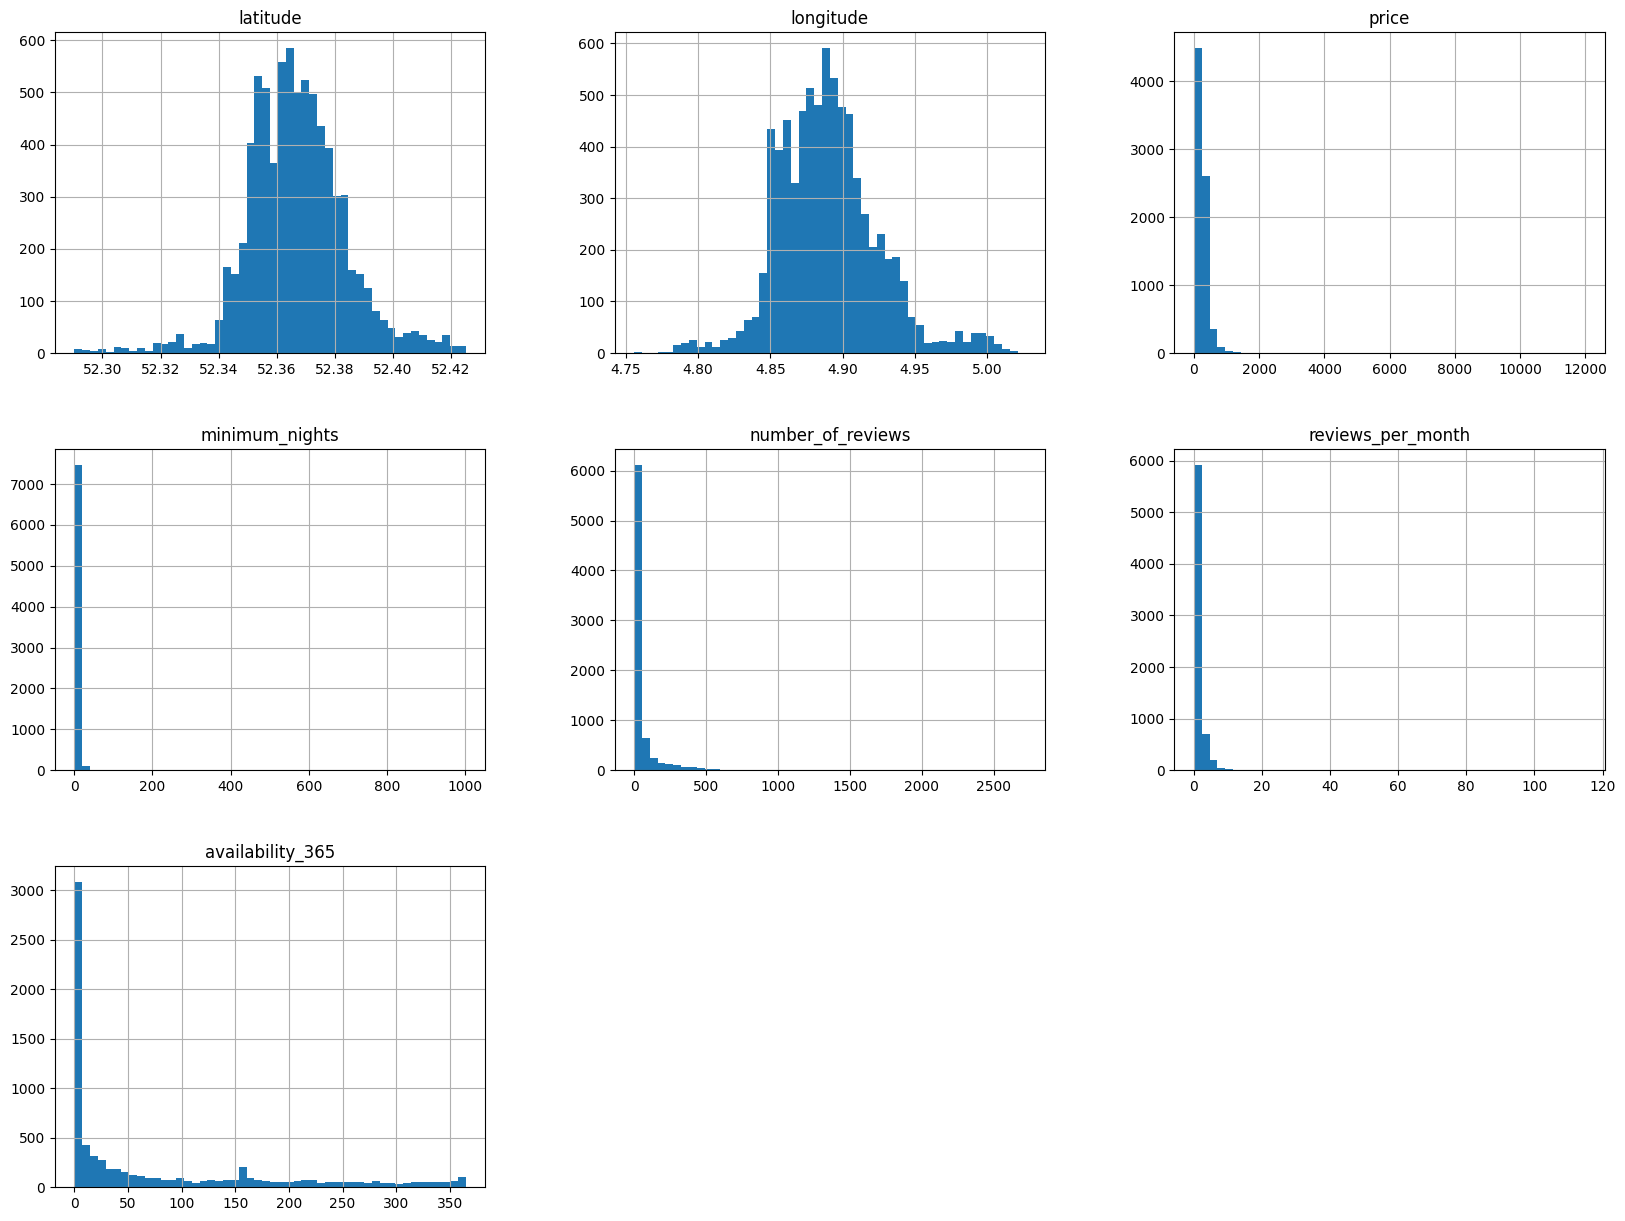

In [57]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

from the histogram there is a few notes:
1. many histograms are tail heavy: they extend much farther to the right of the median except latitude and longitude

# Explore the Data

In [61]:
df.head()

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,52.36435,4.94358,Private room,69,3,336,1.95,7
1,52.36407,4.89393,Private room,106,1,339,2.10,0
2,52.35150,4.89656,Entire home/apt,270,4,23,0.16,2
3,52.36420,4.92829,Entire home/apt,200,3,21,0.15,0
4,52.38761,4.89188,Private room,137,3,251,1.81,0


## Visualizations

> Visualizing Geograpical Data

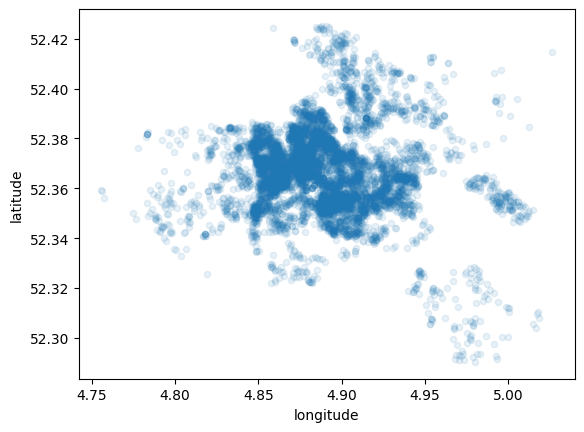

In [62]:
df.plot(x='longitude', y='latitude', kind='scatter', alpha=.1)
plt.show()

>histogram (visualize the distribution of numerical features)


In [118]:
df['price'].value_counts()

250     279
200     266
150     246
300     216
350     161
       ... 
567       1
35        1
7900      1
2400      1
508       1
Name: price, Length: 626, dtype: int64

In [124]:
df['number_of_reviews'].value_counts()

0      710
1      451
2      416
3      385
5      312
      ... 
425      1
397      1
436      1
689      1
940      1
Name: number_of_reviews, Length: 478, dtype: int64

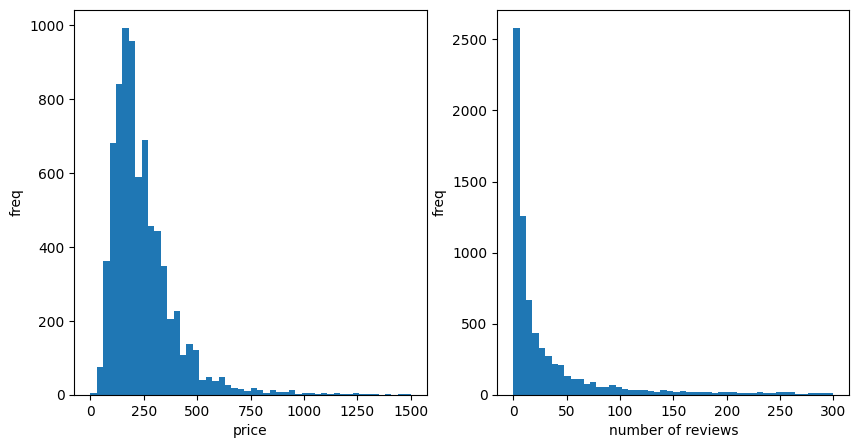

In [131]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].hist(df['price'], bins=50, range=(0, 1500))
ax[0].set_xlabel("price")
ax[0].set_ylabel("freq")

ax[1].hist(df['number_of_reviews'], bins=50, range=(0, 300))
ax[1].set_xlabel("number of reviews")
ax[1].set_ylabel("freq")

plt.show()

>  scatter plots (relationships between two numerical features)


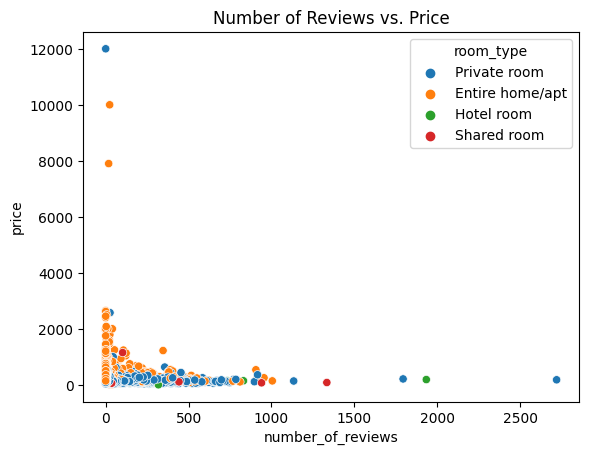

In [64]:
sns.scatterplot(data=df, x='number_of_reviews', y='price', hue='room_type')
plt.title('Number of Reviews vs. Price')
plt.show()

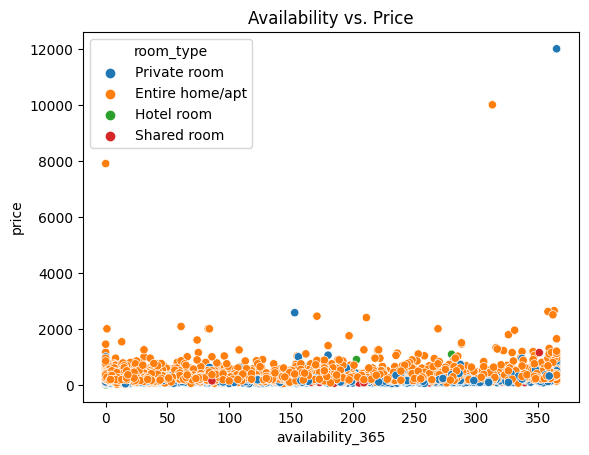

In [166]:
sns.scatterplot(data=df, x='availability_365', y='price', hue='room_type')
plt.title('Availability vs. Price')
plt.show()

> bar charts (For categorical features)


In [251]:
df['room_type'].value_counts()

Entire home/apt    5783
Private room       1726
Hotel room           56
Shared room          43
Name: room_type, dtype: int64

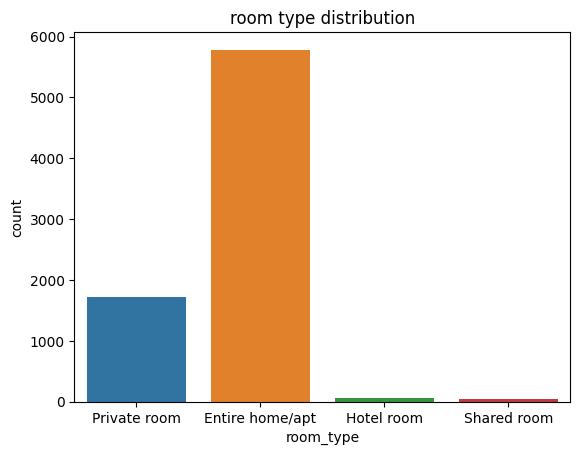

In [252]:
sns.countplot(x='room_type', data=df)
plt.title('room type distribution')
plt.show()

## Correlations


<ipython-input-91-0f52dd28a8b8>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



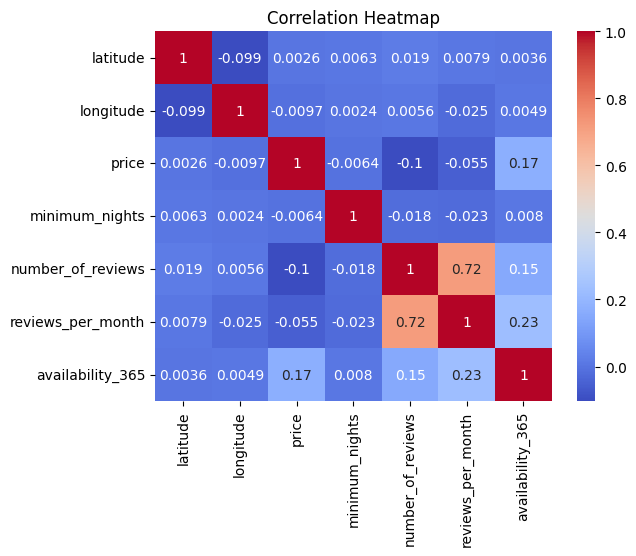

In [91]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

> see how much attr corelates with the price

In [92]:
corr_matrix['price'].sort_values(ascending=False)

price                1.000000
availability_365     0.172511
latitude             0.002626
minimum_nights      -0.006431
longitude           -0.009672
reviews_per_month   -0.055057
number_of_reviews   -0.103004
Name: price, dtype: float64

> visualize correlation using pandas scatter matrix

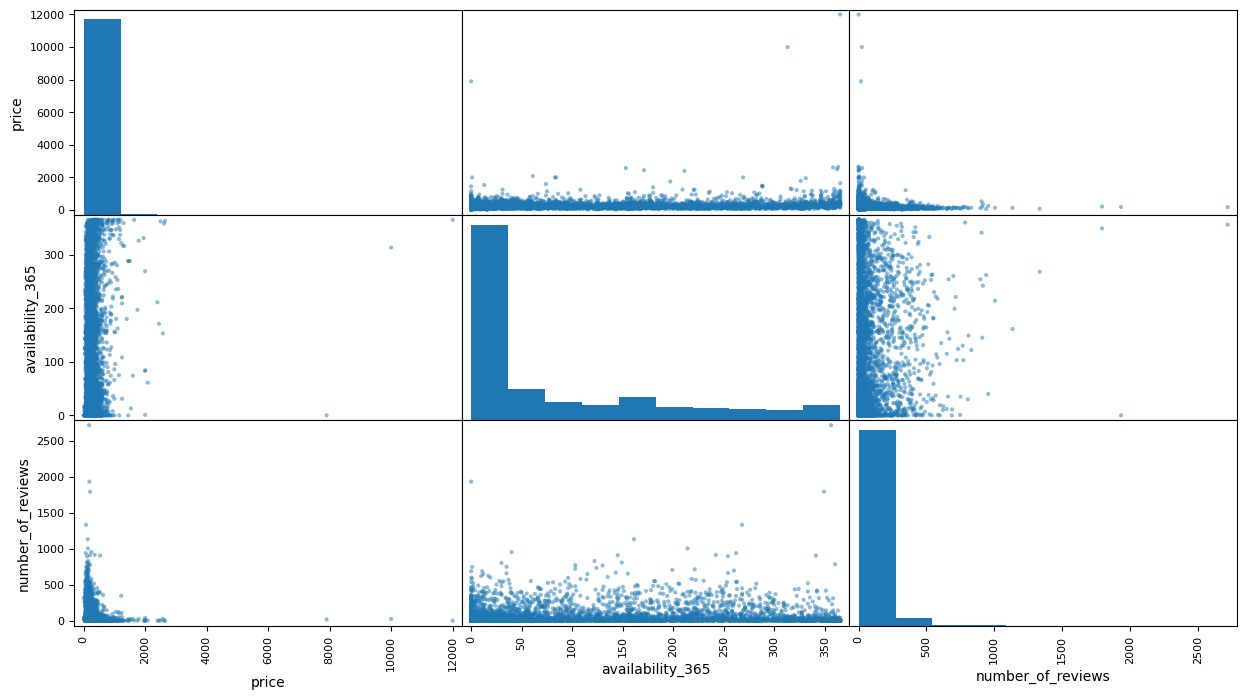

In [69]:
from pandas.plotting import scatter_matrix
important_attr = ['price','availability_365', 'number_of_reviews']
scatter_matrix(df[important_attr], figsize=(15, 8))
plt.show()

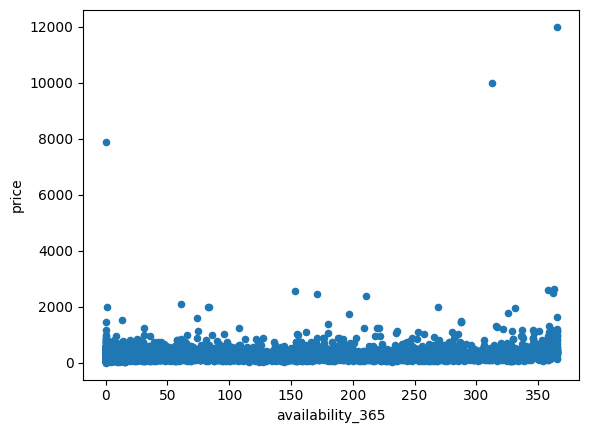

In [70]:
df.plot(x='availability_365', y='price', kind='scatter')
plt.show()

# Create a test set

splits on room_type using StratifiedShuffleSplit to ensure that the distribution of room types is in both the training and testing sets

In [167]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(df, df['room_type']):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]

In [168]:
train_set.shape

(6086, 8)

In [169]:
test_set.shape

(1522, 8)

# Data Cleaning and Feature Scaling

1. fill NaNs from numerical feature
2. scale the numerical features
3. encode catigorical features

In [170]:
X_train = train_set.drop("price", axis=1)
y_train = train_set['price']

In [171]:
X_train.head()

,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,availability_365
3882,52.371100,4.835490,Hotel room,1,4,0.10,0
492,52.365560,4.858670,Private room,1,25,0.23,311
7102,52.388888,4.922216,Entire home/apt,2,2,0.75,8
2047,52.371450,4.852390,Entire home/apt,2,10,0.14,5
1474,52.380180,4.879850,Private room,4,114,1.35,208


In [222]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_features = X_train.drop('room_type', axis=1)
num_attribs = list(num_features)
cat_attribs = ['room_type']

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])


In [223]:
X_train_scaled = full_pipeline.fit_transform(X_train)

# Select and Train Models

In [224]:
from sklearn.model_selection import cross_val_score

In [225]:
def display_scores(scores):
  print("scores", scores)
  print("mean", scores.mean())
  print('std', scores.std())

## Linear Regression

In [226]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_scores = cross_val_score(lin_reg, X_train_scaled, y_train,
                             scoring='neg_mean_squared_error', cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)

In [227]:
display_scores(lin_rmse_scores)

scores [344.77815968 149.40553014 185.91817242 429.08186377 169.71318682
 147.72219335 493.94584573 178.97526153 168.06729343 150.67632347]
mean 241.82838303419598
std 123.55167364011533


## Decison Tree

In [178]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

tree_scores = cross_val_score(tree, X_train_scaled, y_train,
                              scoring='neg_mean_squared_error', cv=10)

tree_rmse_scores = np.sqrt(-tree_scores)

In [179]:
display_scores(tree_rmse_scores)

scores [368.10654067 200.60011873 215.83751034 462.38843948 376.07987046
 504.96939867 511.47827872 194.19582409 201.94109436 457.37663979]
mean 349.2973715321529
std 127.18922974920552


## RandomForest

In [180]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()

forest_scores = cross_val_score(forest, X_train_scaled, y_train,
                                scoring='neg_mean_squared_error', cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)

In [181]:
display_scores(forest_rmse_scores)

scores [341.68757471 151.23367222 181.03203261 428.59373843 223.45527391
 264.09704286 488.88341047 195.16995935 152.00374368 169.03480405]
mean 259.51912522835397
std 114.47321119241359


it seems that linear regression is much better

#Fine Tune Model

## Grid Search

In [228]:
from sklearn.model_selection import GridSearchCV

lin_reg = LinearRegression()

param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [-1, 1]
}


grid_search = GridSearchCV(lin_reg, param_grid, cv=10,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [-1, 1]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [229]:
grid_search.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1}

In [230]:
np.sqrt(-grid_search.best_score_)

271.5621160990748

In [231]:
final_model = grid_search.best_estimator_

In [232]:
from sklearn.metrics import mean_squared_error

X_test = test_set.drop("price", axis=1)
y_test = test_set['price']

X_test_scaled = full_pipeline.transform(X_test)

preds = final_model.predict(X_test_scaled)

test_mse = mean_squared_error(y_test, preds)
test_rmse = np.sqrt(test_mse)

In [233]:
test_rmse

165.12346917042868

> predict for new room

In [236]:
arr = np.array([[52.36435,	4.94358,	'Private room',	3, 336,	1.95,	7]])
new_room = pd.DataFrame(arr, columns=X_test.columns)
new_room_scaled = full_pipeline.transform(new_room)

In [253]:
(f'actual = 69$, predicted= {final_model.predict(new_room_scaled)[0]:.2f}$')

'actual = 69$, predicted= 69.75$'